# Sobel

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/lena.png', 0)

'''
Sobel 函数求完导数后会有负值，还会有大于255的值，
而原图像是uint8，即无符号数（范围在[0, 255]），所以Sobel简历的图像位数不够，会有截断。
因此要使用16位有符号的数据类型，即cv2.CV_16S。
'''

x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
y = cv2.Sobel(img, cv2.CV_16S, 0, 1)

'''
经过处理后，别忘了用convertScaleAbs()函数将其转回原来的uint8形式。
否则将无法显示图像，而只是一幅灰色的窗口。
dst = cv2.convertScaleAbs(src[, dst[, alpha[, beta]]])
其中可选参数alpha是伸缩系数，beta是加到结果的一个值。结果返回uint8类型的图片。
'''

absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

'''
由于Sobel算子是在两个方向计算的，最后还需要cv2.addWeighted(...)函数将其组合起来。
其函数原型为：
dst = cv2.addWeithted(src1, aplha, src2, beta, gamma[, dst[, dtype]])
其中alpha是第一幅图片元素中的权重，beta是第二幅的权重，gamma是加到最后结果上的一个值。
'''

dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

cv2.imshow('absX', absX)
cv2.imshow('absY', absY)

cv2.imshow('Result', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()
plt.subplot(131)
plt.imshow(absX, cmap='gray')
plt.subplot(132)
plt.imshow(absY, cmap='gray')
plt.subplot(133)
plt.imshow(dst, cmap='gray')
plt.show()

<Figure size 640x480 with 3 Axes>

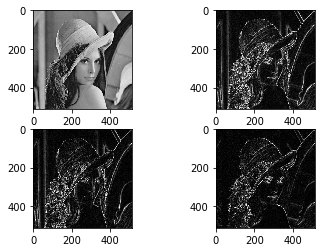

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Sobel(img):
    height, width = img.shape[:2]
    gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
#     tmp_img = img.copy()
    tmp_img = np.zeros((height, width), dtype='uint8')
    img_x = np.zeros((height, width), dtype='uint8')
    img_y = np.zeros((height, width), dtype='uint8')
    for i in range(1, height-1):
        for j in range(1, width-1):
            tmpx = abs(np.sum(gx * img[i-1: i+2, j-1: j+2]))
            tmpy = abs(np.sum(gy * img[i-1: i+2, j-1: j+2]))
            img_x[i, j] = tmpx
            img_y[i, j] = tmpy
            tmp_img[i, j] = np.sqrt(tmpx**2 + tmpy**2)
    return img_x, img_y, tmp_img

img = cv2.imread('images/lena.png', 0)
dstx, dsty, dst = Sobel(img)
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(dst, cmap='gray')
plt.subplot(223)
plt.imshow(dstx, cmap='gray')
plt.subplot(224)
plt.imshow(dsty, cmap='gray')
plt.show()

# PCA

1. 相关背景（做降维的原因）

&emsp;&emsp;多变量大数据集无疑会为研究和应用提供丰富的信息，但是也在一定程度上增加了数据采集的工作量，而且许多变量之间可能坐在相关性，从而增加了问题分析的复杂性。如果对每个指标进行分析，分析往往是孤立的，不能完全利用数据中的信息，因此盲目减少指标会损失很多有用的信息，从而产生错误的结论。因此需要找到一种合理的方法，在减少需要分析的指标的同时，尽量减少包含信息的损失，以达到对所收集信息进行全面分析的目的。由于各变量之间存在一定的相关关系，因此可以考虑将关系紧密的变量变成尽可能少的新变量，使这些变量两两不相关，那么就可以用较少的综合指标分别代表存在于各个变量中的各类信息。

2. 数据降维

降维就是一种对该维度特征数据预处理方法。降维是将高维度的数据保留下最重要的一些特征，去除噪声和不重要的特征，从而实现提升数据处理速度的目的。在实际的生产和应用中，降维在一定的信息损失范围内，可以节省大量的时间成本。降维也称为应用非常广泛的数据预处理方法。

降维具有如下一些优点：
* 使得数据集更易使用；
* 降低算法的计算开销；
* 去除噪声；
* 使得结果容易理解

3. 概念

PCA(Pricipal Component Analysis)，即主成分分析方法，是一种使用最广泛的数据降维算法。PCA的主要思想是将n为特征映射到k维上，这k维是全新的正交特征也被称为主成分，是在原有n维特征的基础上重新构造出来的k为特征。PCA的工作就是从原始的空间中顺序地找一组相互正交的坐标轴，新的坐标轴的选择与数据本身是密切相关的。其中，第一个新坐标轴选择是原始数据中方差最大的方向，第二个新坐标轴选取是与第一个坐标轴正交的平面中使得方差最大的，第三个轴是与第1,2个轴正交的平面中方差最大的。依次类推，可以得到n个这样的坐标轴。通过这种方式获得的新的坐标轴，我们发现，大部分方差都包含在前面k个坐标轴中，后面的坐标轴所含的方差几乎为0。于是，我们可以忽略余下的坐标轴，只保留前面k个含有绝大部分方差的坐标轴。事实上，这相当于只保留包含绝大部分方差的维度特征，而忽略包含方差几乎为0的特征维度，实现对数据特征的降维处理。

**思考：**如何得到这些包含最大差异性的主成分方向？

**答案：**事实上，通过计算数据矩阵的协方差矩阵，然后得到协方差矩阵的特征值特征向量，选择特征值最大(即方差最大)的k个特征所对应的特征向量组成的矩阵。这样就可以将数据矩阵转换到新的空间当中，实现数据特征的降维。

**注意**
* 方差的计算公式是针对一维特征，即针对同一特征不同样本的取值来进行计算得到；而协方差则必须要满足至少二维特征；方差是协方差的特殊情况。
* 方差和协方差的除数是n-1，这是为了得到方差和协方差的无偏估计。

## PCA_numpy_detail

In [3]:
'''
使用PCA求样本矩阵X的K阶降维矩阵Z
'''
import numpy as np

class PCA(object):
    '''
    用PCA求样本矩阵X的K阶降维矩阵Z
    Note：请保证输入的矩阵X shape=(m, n)， m行样例，n个特征
    '''
    def __init__(self, X, K):
        '''
        :param X: 训练样本矩阵X
        :param K: X的降维矩阵的阶数，即X将特征降维成K阶
        '''
        self.X = X # 样本矩阵X
        self.K = K # K阶降维矩阵的K值
        self.centrX = [] # 矩阵X的中心化
        self.C = [] # 样本集的协方差矩阵C
        self.U = [] # 样本矩阵X的降维转换矩阵
        self.Z = [] # 样本矩阵X的降维矩阵Z
        
        self.centrX = self._centralized()
        self.C = self._cov()
        self.U = self._U()
        self.Z = self._Z() # Z=XU求得
        
    def _centralized(self):
        '''矩阵X的中心化'''
        print('样本矩阵X：\n', self.X)
        centrX = []
        mean = np.array([np.mean(attr) for attr in self.X.T]) # 样本集的特征均值
        print('样本集的特征均值：\n', mean)
        centrX = self.X - mean # 样本集中心化
        print('样本矩阵X的中心化centrX：\n', centrX)
        return centrX
    
    def _cov(self):
        '''求样本矩阵X的协方差矩阵C'''
        # 样本集的样例总数
        ns = np.shape(self.centrX)[0]
        # 样本矩阵的协方差矩阵C
        C = np.dot(self.centrX.T, self.centrX)/(ns-1)
        print('样本矩阵X的协方差矩阵C：\n', C)
        return C
    
    def _U(self):
        '''求X的降维矩阵U，shape=(n, k)，n是X的特征维度总数，k是降维矩阵的特征维度'''
        # 先求X的协方差矩阵C的特征值和特征向量
        a, b = np.linalg.eig(self.C) # 特征值赋值给a，对应特征向量赋值给b。函数doc：https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.eig.html 
        print('样本集的协方差矩阵C的特征值：\n', a)
        print('样本集的协方差矩阵C的特征向量：\n', b)
        # 给出特征值降序的topK的索引序列
        ind = np.argsort(-1*a)
        # 构建K阶降维的降维转换矩阵U
        UT = [b[:, ind[i]] for i in range(self.K)]
        U = np.transpose(UT)
        print('%d阶降维矩阵U：\n' % self.K, U)
        return U
    
    def _Z(self):
        '''按照Z=XU求降维矩阵Z，shape=(n, k)，n是样本总数，K是降维矩阵中特征维度总数'''
        Z = np.dot(self.X, self.U)
        print('X shape:', np.shape(self.X))
        print('U shape:', np.shape(self.U))
        print('Z shape:', np.shape(Z))
        print('样本矩阵X的降维矩阵Z：\n', Z)
        return Z
    
if __name__ == '__main__':
    '10样本3特征的样本集，行为样例，列为特征维度'
    X = np.array([[10, 15, 29],
              [15, 46, 13],
              [23, 21, 30],
              [11, 9, 35],
              [42, 45, 11],
              [9, 48, 5],
              [11, 21, 14],
              [8, 5, 15],
              [11, 12, 21],
              [21, 20, 25]])
    K = np.shape(X)[1] - 1
    print('样本集(10行3列，10个样例，每个样例3个特征)：\n', X)
    pca = PCA(X, K)

样本集(10行3列，10个样例，每个样例3个特征)：
 [[10 15 29]
 [15 46 13]
 [23 21 30]
 [11  9 35]
 [42 45 11]
 [ 9 48  5]
 [11 21 14]
 [ 8  5 15]
 [11 12 21]
 [21 20 25]]
样本矩阵X：
 [[10 15 29]
 [15 46 13]
 [23 21 30]
 [11  9 35]
 [42 45 11]
 [ 9 48  5]
 [11 21 14]
 [ 8  5 15]
 [11 12 21]
 [21 20 25]]
样本集的特征均值：
 [16.1 24.2 19.8]
样本矩阵X的中心化centrX：
 [[ -6.1  -9.2   9.2]
 [ -1.1  21.8  -6.8]
 [  6.9  -3.2  10.2]
 [ -5.1 -15.2  15.2]
 [ 25.9  20.8  -8.8]
 [ -7.1  23.8 -14.8]
 [ -5.1  -3.2  -5.8]
 [ -8.1 -19.2  -4.8]
 [ -5.1 -12.2   1.2]
 [  4.9  -4.2   5.2]]
样本矩阵X的协方差矩阵C：
 [[ 108.32222222   74.53333333  -10.08888889]
 [  74.53333333  260.62222222 -106.4       ]
 [ -10.08888889 -106.4          94.17777778]]
样本集的协方差矩阵C的特征值：
 [335.15738485  95.32771231  32.63712506]
样本集的协方差矩阵C的特征向量：
 [[-0.30253213 -0.87499307 -0.37797014]
 [-0.86718533  0.08811216  0.49012839]
 [ 0.39555518 -0.47604975  0.78543792]]
2阶降维矩阵U：
 [[-0.30253213 -0.87499307]
 [-0.86718533  0.08811216]
 [ 0.39555518 -0.47604975]]
X shape: (10, 3)
U shape: (3

## PCA_numpy

In [4]:
import numpy as np

class PCA():
    def __init__(self, n_compoents):
        self.n_compoents = n_compoents
        
    def fit_transform(self, X):
        self.n_features_ = X.shape[1]
        # 求协方差矩阵
        X = X - X.mean(axis=0)
        self.covariance = np.dot(X.T, X)/X.shape[0]
        # 求协方差矩阵的特征值和特征向量
        eig_vals, eig_verctors = np.linalg.eig(self.covariance)
        # 获得降序排列特征值的序号
        idx = np.argsort(-eig_vals)
        # 降维矩阵
        self.n_compoents_ = eig_verctors[:, idx[:self.n_compoents]]
        # 对X进行降维
        return np.dot(X, self.n_compoents_)
    
# 调用
pca = PCA(n_compoents=2)
X = np.array([[-1,2,66,-1], [-2,6,58,-1], [-3,8,45,-2], [1,9,36,1], [2,10,62,1], [3,5,83,2]])  #导入数据，维度为4
newX = pca.fit_transform(X)
print(newX) # 输出降维后的数据

[[  7.96504337  -4.12166867]
 [ -0.43650137  -2.07052079]
 [-13.63653266  -1.86686164]
 [-22.28361821   2.32219188]
 [  3.47849303   3.95193502]
 [ 24.91311585   1.78492421]]


## PCA_sklearn

In [5]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1,2,66,-1], [-2,6,58,-1], [-3,8,45,-2], [1,9,36,1], [2,10,62,1], [3,5,83,2]])  #导入数据，维度为4
pca = PCA(n_components=2) # 降到2维
pca.fit(X) # 训练
newX = pca.fit_transform(X) # 降维后的数据
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_) # 输出贡献率
print(newX) # 输出降维后的数据

[0.95713353 0.03398198]
[[  7.96504337   4.12166867]
 [ -0.43650137   2.07052079]
 [-13.63653266   1.86686164]
 [-22.28361821  -2.32219188]
 [  3.47849303  -3.95193502]
 [ 24.91311585  -1.78492421]]


## PCA

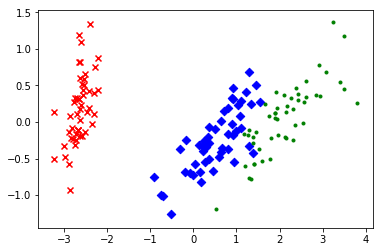

In [6]:
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.datasets.base import load_iris

x, y = load_iris(return_X_y=True) # 加载数据，x表示数据集中的属性数据，y表示数据标签
pca = dp.PCA(n_components=2) # 加载pca算法，设置降维后主成分数目为2
reduce_x = pca.fit_transform(x) # 原始数据进行降维，保存在reduce_x中
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduce_x)): # 按鸢尾花的类别将降维后的数据点保存在不同的表中
    if y[i] == 0:
        red_x.append(reduce_x[i][0])
        red_y.append(reduce_x[i][1])
    elif y[i] == 1:
        blue_x.append(reduce_x[i][0])
        blue_y.append(reduce_x[i][1])
    else:
        green_x.append(reduce_x[i][0])
        green_y.append(reduce_x[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()